In [75]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [93]:

search_df  = pd.read_csv( 'search_data.csv' , low_memory=False )
sdf = search_df.copy()

# Search data

In [94]:
sdf.head(3)

,search_id,search_time,currency,destination,search_user_id,language,origin,partner_id,passengers,pos,session_id,user_agent,num_requests,fare,supplier,cabin_class,carrier_1,carrier_2,flight_num_1,flight_num_2,departure_datetime_1,arrival_datetime_1,departure_datetime_2,arrival_datetime_2,itinerary_id
0,02c6c2ad-325b-4155-bb03-89badc92ea84,2017-02-01 00:00:07,USD,MIA,NBYNv9utORVjlf604rUgXL/eFz6Tmu2NyygDWTFsM5OOWH...,en,LAX,294,1,US,292c32ab-9744-490f-911a-d3536e86847e,Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-G920...,1,499.00,22,economy,AA,AA,AA1088,AA1147,2017-04-07T09:50:00-07:00,2017-04-07T17:56:00-04:00,2017-04-16T21:30:00-04:00,2017-04-17T00:33:00-07:00,294f363b-86f0-4e67-abe9-05221dadb8b8
1,0280e382-d24e-4138-bb20-8d236c0bb02f,2017-02-01 00:00:32,ISK,VCE,c2ea8bd4-40ff-4b8b-a42f-ada9b02ef963,en,REK,58,1,IS,d34dd58d-aec5-4d8f-abf7-090db2e011bd,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_2...,7,25895.00,103,Economy,FI; IB,NaN,FI540; IB5120,NaN,2017-06-10T01:05:00; 2017-06-10T14:50:00,2017-06-10T06:20:00; 2017-06-10T16:40:00,NaN,NaN,d9592a05-c850-4abd-9cf1-9fe8343d556c
2,c8903983-3eb9-4f0f-8f87-64b7e5dd0692,2017-02-01 00:00:39,USD,SJD,36195bda-ec40-4907-9428-c4fe11bd87fa,en,LAX,91,1,US,e0ae1ecd-8715-4577-bca4-604cf3a58d0e,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG-SM-...,1,286.79,91,economy,AA,AA,AA237,AA237,2017-05-30T08:35:00,2017-05-30T11:58:00,2017-06-03T13:00:00,2017-06-03T14:36:00,c53826cf-1fba-42a6-a765-941628e1901e


In [95]:
train_cols = [
    'destination',
    'carrier_1',
    'passengers',
    'fare'
]

sdf = sdf[train_cols]

sdf

,destination,carrier_1,passengers,fare
0,MIA,AA,1,499.00
1,VCE,FI; IB,1,25895.00
2,SJD,AA,1,286.79
3,LHR,DL; DL,2,507.46
4,BFS,FI; FR,2,47717.49
...,...,...,...,...
1277076,BOS,AA,1,287.90
1277077,JFK,BW; BW,1,1337.46
1277078,CHI,AA; AA,1,212.30
1277079,NYC,AA; AA,1,343.50


In [96]:
sdf['Yfare'] = sdf.fare.to_numpy()/(sdf.passengers.to_numpy()+1)
sdf = sdf[['destination',	'carrier_1', 'Yfare']].dropna().copy()

In [97]:
from sklearn.feature_extraction import DictVectorizer

xdata = sdf[['destination', 'carrier_1']]
xdata = xdata.to_dict('records')
xdata


[{'destination': 'MIA', 'carrier_1': 'AA'},
 {'destination': 'VCE', 'carrier_1': 'FI; IB'},
 {'destination': 'SJD', 'carrier_1': 'AA'},
 {'destination': 'LHR', 'carrier_1': 'DL; DL'},
 {'destination': 'BFS', 'carrier_1': 'FI; FR'},
 {'destination': 'LAX', 'carrier_1': 'AA'},
 {'destination': 'MCO', 'carrier_1': 'UA; UA'},
 {'destination': 'NYC', 'carrier_1': 'DL; DL'},
 {'destination': 'PBI', 'carrier_1': 'AA; AA'},
 {'destination': 'LHR', 'carrier_1': 'TP; TP; TP'},
 {'destination': 'TPA', 'carrier_1': 'AA'},
 {'destination': 'MCO', 'carrier_1': 'B6'},
 {'destination': 'BNA', 'carrier_1': 'WN; WN'},
 {'destination': 'RDU', 'carrier_1': 'AA; AA'},
 {'destination': 'BUE', 'carrier_1': 'AR'},
 {'destination': 'FAO', 'carrier_1': 'AB; AB'},
 {'destination': 'ROM', 'carrier_1': 'VY'},
 {'destination': 'ALC', 'carrier_1': 'VY; VY'},
 {'destination': 'MOW', 'carrier_1': 'BA; BA'},
 {'destination': 'BOS', 'carrier_1': 'B6'},
 {'destination': 'VIE', 'carrier_1': 'WW; BA'},
 {'destination': 'PH

In [98]:
xv = DictVectorizer()
X = xv.fit_transform(xdata)
X

<1277081x14301 sparse matrix of type '<class 'numpy.float64'>'
	with 2554162 stored elements in Compressed Sparse Row format>

In [99]:
Y = sdf['Yfare']
Y

0            249.500000
1          12947.500000
2            143.395000
3            169.153333
4          15905.830000
               ...     
1277076      143.950000
1277077      668.730000
1277078      106.150000
1277079      171.750000
1277080       97.730000
Name: Yfare, Length: 1277081, dtype: float64

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.impute import SimpleImputer

In [101]:
X2 = SimpleImputer(missing_values=np.nan, strategy='mean')
X2 = X2.fit_transform(X)

# yi = SimpleImputer(missing_values=np.nan, strategy='mean')
# Y = np.array(Y).reshape(-1,1)
# Y2 = yi.fit_transform(Y)

In [102]:
Y

0            249.500000
1          12947.500000
2            143.395000
3            169.153333
4          15905.830000
               ...     
1277076      143.950000
1277077      668.730000
1277078      106.150000
1277079      171.750000
1277080       97.730000
Name: Yfare, Length: 1277081, dtype: float64

In [103]:
model = LinearRegression()

model.fit(X2, Y)

LinearRegression()

In [104]:
y_predicted = model.predict(X2)
y_predicted

array([ 9.69920015e+01,  2.53296402e+04,  2.05754070e+01, ...,
        1.55175072e+02, -4.70522875e+01, -1.79843972e+02])

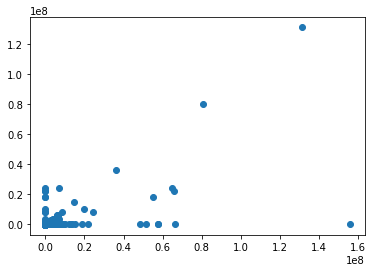

In [105]:
import matplotlib.pyplot as plt

plt.scatter(Y, y_predicted)

In [106]:
search_df.cabin_class.value_counts()

economy            1187830
Economy              65283
mixed                16650
business              2948
first                 2578
premium_economy       1499
Business               154
premiumEconomy          42
Premium Economy         33
First                   30
ECONOMY                 25
COACH                    6
First Class              3
Name: cabin_class, dtype: int64

In [107]:
def clean_class(val):
    return val.split(' ')[0].replace('_','').replace('mEconomy','m').replace('premiumeconomy', 'premium').lower()

search_df['cleanclass'] = [ clean_class(x) for x in search_df['cabin_class'] ]
search_df.cleanclass.value_counts()

economy     1253138
mixed         16650
business       3102
first          2611
premium        1574
coach             6
Name: cleanclass, dtype: int64

it is badly imbalanced

In [108]:
search_df = search_df[~search_df.cleanclass.isin(['coach','mixed'])]
search_df.cleanclass.value_counts()

economy     1253138
business       3102
first          2611
premium        1574
Name: cleanclass, dtype: int64

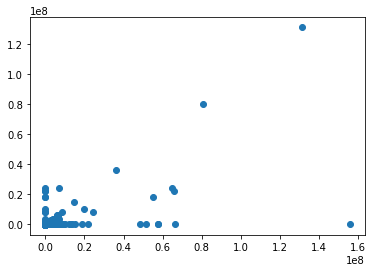

In [110]:
sdf = search_df.copy()
train_cols = [
    'destination',
    'carrier_1',
    'passengers',
    'cleanclass',
    'fare'
]

sdf = sdf[train_cols]

sdf['Yfare'] = sdf.fare.to_numpy()/(sdf.passengers.to_numpy()+1)
sdf = sdf[['destination',	'carrier_1', 'cleanclass', 'Yfare']].dropna().copy()

from sklearn.feature_extraction import DictVectorizer

xdata = sdf[['destination', 'carrier_1']]
xdata = xdata.to_dict('records')
xv = DictVectorizer()
X = xv.fit_transform(xdata)
Y = sdf['Yfare']
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.impute import SimpleImputer
X2 = SimpleImputer(missing_values=np.nan, strategy='mean')
X2 = X2.fit_transform(X)
model = LinearRegression()

model.fit(X2, Y)

y_predicted = model.predict(X2)
y_predicted
import matplotlib.pyplot as plt

plt.scatter(Y, y_predicted)

In [ ]:
dfs = [bdf, sdf]

joined = pd.concat(dfs, keys ='session_id', join='outer')
joined = joined[~pd.isnull(joined.booking_id)]\
               .sort_values(by='booking_time')


print('len joined:',len(joined))

joined

In [179]:
s_cols = [   'booking_id', 
          'session_id',
          'destination',
         #    'language',
             'origin',
        #     'partner_id',
             'passengers',
       #      'pos',
#              'session_id',
             'user_agent',
             'fare',
       #      'supplier',
             'cabin_class',
             'carrier_1',
             'carrier_2',
         'arrival_datetime_1',
         'arrival_datetime_2']
          
          

In [180]:
dd = joined[s_cols]

dd['Yfare'] = dd['fare'].to_numpy()/dd['passengers'].to_numpy()

dd = dd[(dd.carrier_1 == dd.carrier_2) ].copy()

dd.head()

<ipython-input-180-624fc1d3d240>:3: RuntimeWarning: divide by zero encountered in true_divide
  dd['Yfare'] = dd['fare'].to_numpy()/dd['passengers'].to_numpy()
<ipython-input-180-624fc1d3d240>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['Yfare'] = dd['fare'].to_numpy()/dd['passengers'].to_numpy()


booking_id  \
s 0  7ec12305-ba84-419a-8fc0-6aaf78d9abb2   
  2  d3db456d-538d-4f98-a2a0-d6bcedf3b459   
  3  b9133358-7e81-4aea-bce8-8c79823c4ac8   
  4  4699db09-65c2-492f-9aa6-c9e7734a60c1   
  5  75ca3bdd-013e-4dee-9e52-2c0c3df9ae4b   

                               session_id destination origin  passengers  \
s 0  e0ae1ecd-8715-4577-bca4-604cf3a58d0e         SJD    LAX           1   
  2  97d78806-2f65-48af-9d21-e7f9bb6a667c         MCO    EGE           1   
  3  1eb74ec2-e6d7-4423-a1e3-de2a411a4aed         LHR    PHX           2   
  4  4651b45f-2325-48e2-b55e-e4fd60994d6f         LHR    SFO           1   
  5  6619e1b4-7335-4ff3-9b9b-88bdc65ed715         PBI    FLO           3   

                                            user_agent    fare cabin_class  \
s 0  Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG-SM-...  286.79     economy   
  2  Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...  615.60     economy   
  3  Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...  507.46     economy   
  4  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_2...  888.86     economy   
  5  Mozilla/5.0 (Linux; Android 6.0; RCT6513W87 Bu...  352.60     economy   

      carrier_1   carrier_2  \
s 0          AA          AA   
  2      UA; UA      UA; UA   
  3      DL; DL      DL; DL   
  4  TP; TP; TP  TP; TP; TP   
  5      AA; AA      AA; AA   

                                    arrival_datetime_1  \
s 0                                2017-05-30T11:58:00   
  2           2017-02-10T09:03:00; 2017-02-10T16:31:00   
  3           2017-05-10T14:45:00; 2017-05-11T12:55:00   
  4  2017-03-06T16:35:00; 2017-03-07T07:15:00; 2017...   
  5           2017-05-26T06:16:00; 2017-05-26T09:31:00   

                                    arrival_datetime_2       Yfare  
s 0                                2017-06-03T14:36:00  286.790000  
  2           2017-02-13T10:30:00; 2017-02-13T13:41:00  615.600000  
  3           2017-05-28T16:05:00; 2017-05-28T19:11:00  253.730000  
  4  2017-03-09T08:35:00; 2017-03-09T20:15:00; 2017...  888.860000  
  5           2017-05-28T10:18:00; 2017-05-28T13:50:00  117.533333

In [171]:


Xcol = ['booking_id', 
        'session_id', 
        'destination', 
        'origin', 
        'passengers',
        'user_agent', 
        #'fare', 
        'cabin_class', 
        'carrier_1',
        'arrival_datetime_1', 
        'arrival_datetime_2',

         'Yfare']
    
Ycol='Yfare'

Xdf = dd[Xcol]
Ydf = dd[Ycol]


assert len(Xdf) == len(Ydf)
print(len(Xdf),len(Ydf))
Xdf.head(4)

9920 9920


booking_id  \
s 0  7ec12305-ba84-419a-8fc0-6aaf78d9abb2   
  2  d3db456d-538d-4f98-a2a0-d6bcedf3b459   
  3  b9133358-7e81-4aea-bce8-8c79823c4ac8   
  4  4699db09-65c2-492f-9aa6-c9e7734a60c1   

                               session_id  \
s 0  e0ae1ecd-8715-4577-bca4-604cf3a58d0e   
  2  97d78806-2f65-48af-9d21-e7f9bb6a667c   
  3  1eb74ec2-e6d7-4423-a1e3-de2a411a4aed   
  4  4651b45f-2325-48e2-b55e-e4fd60994d6f   

                               session_id destination origin  passengers  \
s 0  e0ae1ecd-8715-4577-bca4-604cf3a58d0e         SJD    LAX           1   
  2  97d78806-2f65-48af-9d21-e7f9bb6a667c         MCO    EGE           1   
  3  1eb74ec2-e6d7-4423-a1e3-de2a411a4aed         LHR    PHX           2   
  4  4651b45f-2325-48e2-b55e-e4fd60994d6f         LHR    SFO           1   

                                            user_agent cabin_class  \
s 0  Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG-SM-...     economy   
  2  Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...     economy   
  3  Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...     economy   
  4  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_2...     economy   

      carrier_1                                 arrival_datetime_1  \
s 0          AA                                2017-05-30T11:58:00   
  2      UA; UA           2017-02-10T09:03:00; 2017-02-10T16:31:00   
  3      DL; DL           2017-05-10T14:45:00; 2017-05-11T12:55:00   
  4  TP; TP; TP  2017-03-06T16:35:00; 2017-03-07T07:15:00; 2017...   

                                    arrival_datetime_2   Yfare  
s 0                                2017-06-03T14:36:00  286.79  
  2           2017-02-13T10:30:00; 2017-02-13T13:41:00  615.60  
  3           2017-05-28T16:05:00; 2017-05-28T19:11:00  253.73  
  4  2017-03-09T08:35:00; 2017-03-09T20:15:00; 2017...  888.86

In [172]:
Ydf.head(4)

s  0    286.79
   2    615.60
   3    253.73
   4    888.86
Name: Yfare, dtype: float64

In [173]:
Xdf.cabin_class.value_counts()

economy            8447
Economy            1315
mixed                37
premium_economy      31
business             26
first                24
Business             21
First                 7
COACH                 6
Premium Economy       6
Name: cabin_class, dtype: int64

In [174]:
def clean_class(val):
    return val.split(' ')[0].replace('_','').replace('mEconomy','m').replace('premiumeconomy', 'premium').lower()

Xdf['cleanclass'] = [ clean_class(x) for x in Xdf['cabin_class'] ]
Xdf.cleanclass.value_counts()

<ipython-input-174-6cd7d857778d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xdf['cleanclass'] = [ clean_class(x) for x in Xdf['cabin_class'] ]


economy     9762
business      47
mixed         37
premium       37
first         31
coach          6
Name: cleanclass, dtype: int64

In [175]:
Xdf = Xdf[~Xdf.cleanclass.isin(['coach','mixed'])]
Xdf.cleanclass.value_counts()

economy     9762
business      47
premium       37
first         31
Name: cleanclass, dtype: int64

In [176]:
Xdf.user_agent.value_counts()[:25]

Mozilla/5.0 (iPhone; CPU iPhone OS 10_2_1 like Mac OS X) AppleWebKit/602.4.6 (KHTML, like Gecko) Version/10.0 Mobile/14D27 Safari/602.1                                                         518
Mozilla/5.0 (iPhone; CPU iPhone OS 10_2 like Mac OS X) AppleWebKit/602.3.12 (KHTML, like Gecko) Version/10.0 Mobile/14C92 Safari/602.1                                                          329
Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36                                                                                   270
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36                                                                                    261
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.79 Safari/537.36 Edge/14.14393                                                                171
Mozilla/5.0 (Windows

In [177]:

def get_top_N(df, colname, n):
    return df[colname].value_counts()[:n].index.tolist()


get_top_N(Xdf,'user_agent',50)


['Mozilla/5.0 (iPhone; CPU iPhone OS 10_2_1 like Mac OS X) AppleWebKit/602.4.6 (KHTML, like Gecko) Version/10.0 Mobile/14D27 Safari/602.1',
 'Mozilla/5.0 (iPhone; CPU iPhone OS 10_2 like Mac OS X) AppleWebKit/602.3.12 (KHTML, like Gecko) Version/10.0 Mobile/14C92 Safari/602.1',
 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36',
 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.79 Safari/537.36 Edge/14.14393',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36',
 'Mozilla/5.0 (iPhone; CPU iPhone OS 10_1_1 like Mac OS X) AppleWebKit/602.2.14 (KHTML, like Gecko) Version/10.0 Mobile/14B100 Safari/602.1',
 'Mozilla/5.0 (Windows NT 10.0; WOW64; rv:51.0) Gecko/20100101 Firefox/51.0',
 'Mozilla/5.0 (Windows

In [178]:
Xdf = Xdf[Xdf.user_agent.isin(get_top_N(Xdf,'user_agent',50))]

Xdf

booking_id  \
s 2      d3db456d-538d-4f98-a2a0-d6bcedf3b459   
  4      4699db09-65c2-492f-9aa6-c9e7734a60c1   
  15     7725ece0-e798-4938-94fd-a30a82f2110d   
  21     b2a6618d-95f7-4bca-bf8e-c935551e8192   
  23     7a096e98-ab08-463e-a909-cca61589a9ae   
...                                       ...   
  16831  8254d69d-79e9-4b1c-af53-e7cf4845bdf5   
  16835  e6389dbd-8447-4647-9e1c-5c9404b1f340   
  16842  6ee7cac5-82d6-44c7-b8f4-72e49c633a65   
  16845  52f8089f-54f4-42d9-bf01-cca0535fa12c   
  16849  0607ee5d-006d-47d0-8b51-6702c1eaad7a   

                                   session_id  \
s 2      97d78806-2f65-48af-9d21-e7f9bb6a667c   
  4      4651b45f-2325-48e2-b55e-e4fd60994d6f   
  15     2125b70f-122b-4af6-9c1c-4ea01c575781   
  21     d5d2bd3a-eab5-4ecd-9ca9-4aa74eb3c6c0   
  23     d2d8e9e5-ac6e-4fc0-85d4-b10363df7d23   
...                                       ...   
  16831  310353ef-91ac-4654-9723-d529e4605168   
  16835  24b018ea-59b3-4582-b102-830a93f1343f   
  16842  cb87f626-b6bd-4792-9466-fbd123ca1acd   
  16845  57c5a8d2-3626-42b0-8296-4b76152f36c8   
  16849  674f1cd3-fb87-428d-8b4e-56f1470c254b   

                                   session_id destination origin  passengers  \
s 2      97d78806-2f65-48af-9d21-e7f9bb6a667c         MCO    EGE           1   
  4      4651b45f-2325-48e2-b55e-e4fd60994d6f         LHR    SFO           1   
  15     2125b70f-122b-4af6-9c1c-4ea01c575781         LON    SLC           3   
  21     d5d2bd3a-eab5-4ecd-9ca9-4aa74eb3c6c0         YYC    STS           2   
  23     d2d8e9e5-ac6e-4fc0-85d4-b10363df7d23         RDU    SBN           1   
...                                       ...         ...    ...         ...   
  16831  310353ef-91ac-4654-9723-d529e4605168         LAX    ATL           1   
  16835  24b018ea-59b3-4582-b102-830a93f1343f         KOA    LAX           5   
  16842  cb87f626-b6bd-4792-9466-fbd123ca1acd         NBO    LAX           3   
  16845  57c5a8d2-3626-42b0-8296-4b76152f36c8         MSY    ATL           1   
  16849  674f1cd3-fb87-428d-8b4e-56f1470c254b         CAI    MXP           1   

                                                user_agent cabin_class  \
s 2      Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...     economy   
  4      Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_2...     economy   
  15     Mozilla/5.0 (Linux; Android 6.0.1; SM-G935V Bu...     economy   
  21     Mozilla/5.0 (Windows NT 10.0; WOW64; rv:51.0) ...     economy   
  23     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...     economy   
...                                                    ...         ...   
  16831  Mozilla/5.0 (iPhone; CPU iPhone OS 10_0_2 like...     economy   
  16835  Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...     economy   
  16842  Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....     economy   
  16845  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...     economy   
  16849  Dalvik/2.1.0 (Linux; U; Android 6.0.1; SM-G920...     economy   

          carrier_1                                 arrival_datetime_1  \
s 2          UA; UA           2017-02-10T09:03:00; 2017-02-10T16:31:00   
  4      TP; TP; TP  2017-03-06T16:35:00; 2017-03-07T07:15:00; 2017...   
  15         AA; AA           2017-04-07T15:35:00; 2017-04-08T09:05:00   
  21         AS; AS           2017-05-30T18:34:00; 2017-05-30T23:55:00   
  23         UA; UA           2017-02-14T11:29:00; 2017-02-14T16:43:00   
...             ...                                                ...   
  16831          AA                                2017-03-03T21:13:00   
  16835          AA                                2017-07-21T13:38:00   
  16842  AC; AC; AC  2017-06-13T20:40:00; 2017-06-15T07:05:00; 2017...   
  16845          DL                                2017-04-06T23:30:00   
  16849          MS                          2017-03-14T18:15:00+02:00   

                                        arrival_datetime_2        Yfare  \
s 2               2017-02-13T10:30:00; 2017

In [62]:
dfs = [bdf, sdf]

joined = pd.concat(dfs, keys ='session_id')

joined = joined.sort_values(by='booking_time')


In [19]:
sdf[sdf.session_id.isin(bdf.session_id)]

,search_id,search_time,currency,destination,search_user_id,language,origin,partner_id,passengers,pos,...,cabin_class,carrier_1,carrier_2,flight_num_1,flight_num_2,departure_datetime_1,arrival_datetime_1,departure_datetime_2,arrival_datetime_2,itinerary_id
2,c8903983-3eb9-4f0f-8f87-64b7e5dd0692,2017-02-01 00:00:39,USD,SJD,36195bda-ec40-4907-9428-c4fe11bd87fa,en,LAX,91,1,US,...,economy,AA,AA,AA237,AA237,2017-05-30T08:35:00,2017-05-30T11:58:00,2017-06-03T13:00:00,2017-06-03T14:36:00,c53826cf-1fba-42a6-a765-941628e1901e
3,b1d666c8-d570-47ec-bc46-26ee5332620f,2017-02-01 00:00:48,USD,LHR,36ba8a8c-8c47-4dc6-bd70-0b3ae071c8cf,en,PHX,91,2,US,...,economy,DL; DL,DL; DL,DL5852; DL4414,DL11; DL1516,2017-05-10T13:13:00; 2017-05-10T18:30:00,2017-05-10T14:45:00; 2017-05-11T12:55:00,2017-05-28T12:55:00; 2017-05-28T17:50:00,2017-05-28T16:05:00; 2017-05-28T19:11:00,37a44686-8347-4c72-8690-c9432349f9a6
5,0abbfe4c-b72d-42c7-ae8a-966643e14600,2017-02-01 00:00:54,USD,LAX,025ee32b-2a0b-4987-b275-893f148ab259,en,CMH,91,1,US,...,economy,AA,NaN,AA659,NaN,2017-03-29T16:35:00,2017-03-29T18:53:00,NaN,NaN,2e3afcd8-7d56-4b49-a71b-f85c23e1b807
6,198f2d0f-4f30-418c-bf78-ccf776a63501,2017-02-01 00:01:02,USD,MCO,f69465d7-cdb2-4dd0-98ad-6362423a8dc3,en,EGE,91,1,US,...,economy,UA; UA,UA; UA,UA4475; UA564,UA1191; UA1252,2017-02-10T07:52:00; 2017-02-10T11:00:00,2017-02-10T09:03:00; 2017-02-10T16:31:00,2017-02-13T08:47:00; 2017-02-13T11:40:00,2017-02-13T10:30:00; 2017-02-13T13:41:00,619b0f7c-825f-47b1-a191-300862feff80
8,bf0709c2-5775-48aa-952b-35f88430c431,2017-02-01 00:01:11,USD,PBI,7864485d-5c63-45ee-9e4d-a3c43e078b36,en,FLO,91,3,US,...,economy,AA; AA,AA; AA,AA4933; AA1846,AA539; AA4860,2017-05-26T05:25:00; 2017-05-26T07:40:00,2017-05-26T06:16:00; 2017-05-26T09:31:00,2017-05-28T08:25:00; 2017-05-28T13:00:00,2017-05-28T10:18:00; 2017-05-28T13:50:00,ead1e4c6-6d82-4aed-9d65-94e4b4d67ab0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275806,18c67fe4-eba4-4de0-9561-48805ba3f1a5,2017-02-23 23:24:13,USD,KOA,b4a9623b-1d1c-4876-9631-64f995e780de,en,LAX,91,5,US,...,economy,AA,AA,AA59,AA58,2017-07-21T10:50:00,2017-07-21T13:38:00,2017-08-05T15:07:00,2017-08-05T23:17:00,0de64900-7999-4564-bad9-64a0d7dc3db9
1275873,608f4366-d530-4d17-a45d-2a5a53bd93b9,2017-02-23 23:24:31,GBP,BCN,94b52a09030779f80911944188c65fb517b0af161f8d88...,en_UK,MAN,221,4,GB,...,Economy,FR,FR,FR7542,FR7545,2017-04-03T06:25:00,2017-04-03T09:45:00,2017-04-09T22:05:00,2017-04-09T23:45:00,c7acf53a-0648-4f70-9946-a5b9d8fca4de
1276118,dae94b65-f12c-4540-b4b7-08f52e38d3f4,2017-02-23 23:25:23,USD,HYD,4d309822-a272-494a-8691-4e0a8e76036d,en,SFO,91,1,US,...,economy,CX; CX,CX; CX,CX879; CX649,CX646; CX892,2017-06-17T13:30:00; 2017-06-18T21:15:00,2017-06-18T18:55:00; 2017-06-19T00:30:00,2017-08-19T01:50:00; 2017-08-19T18:45:00,2017-08-19T09:40:00; 2017-08-19T16:25:00,8e04e4a5-3ef5-4706-906e-dcc693b368a5
1276322,d8268516-6df7-448e-b881-f20b9f5c8c0d,2017-02-23 23:26:18,USD,MID,6d57ab2b-6c1b-4788-a6fb-ffe37c402325,en,PHX,91,1,US,...,economy,UA; UA,NaN,UA978; UA1426,NaN,2017-04-16T05:00:00; 2017-04-16T17:50:00,2017-04-16T09:31:00; 2017-04-16T19:54:00,NaN,NaN,4f40fa8a-aba6-44b2-97b3-1996a67e84c2


In [28]:
y = joined['fare']

x = joined[[_ for _ in joined.columns if _ != 'fare']]

In [26]:
sdf.head()

,search_id,search_time,currency,destination,search_user_id,language,origin,partner_id,passengers,pos,...,cabin_class,carrier_1,carrier_2,flight_num_1,flight_num_2,departure_datetime_1,arrival_datetime_1,departure_datetime_2,arrival_datetime_2,itinerary_id
0,02c6c2ad-325b-4155-bb03-89badc92ea84,2017-02-01 00:00:07,USD,MIA,NBYNv9utORVjlf604rUgXL/eFz6Tmu2NyygDWTFsM5OOWH...,en,LAX,294,1,US,...,economy,AA,AA,AA1088,AA1147,2017-04-07T09:50:00-07:00,2017-04-07T17:56:00-04:00,2017-04-16T21:30:00-04:00,2017-04-17T00:33:00-07:00,294f363b-86f0-4e67-abe9-05221dadb8b8
1,0280e382-d24e-4138-bb20-8d236c0bb02f,2017-02-01 00:00:32,ISK,VCE,c2ea8bd4-40ff-4b8b-a42f-ada9b02ef963,en,REK,58,1,IS,...,Economy,FI; IB,NaN,FI540; IB5120,NaN,2017-06-10T01:05:00; 2017-06-10T14:50:00,2017-06-10T06:20:00; 2017-06-10T16:40:00,NaN,NaN,d9592a05-c850-4abd-9cf1-9fe8343d556c
2,c8903983-3eb9-4f0f-8f87-64b7e5dd0692,2017-02-01 00:00:39,USD,SJD,36195bda-ec40-4907-9428-c4fe11bd87fa,en,LAX,91,1,US,...,economy,AA,AA,AA237,AA237,2017-05-30T08:35:00,2017-05-30T11:58:00,2017-06-03T13:00:00,2017-06-03T14:36:00,c53826cf-1fba-42a6-a765-941628e1901e
3,b1d666c8-d570-47ec-bc46-26ee5332620f,2017-02-01 00:00:48,USD,LHR,36ba8a8c-8c47-4dc6-bd70-0b3ae071c8cf,en,PHX,91,2,US,...,economy,DL; DL,DL; DL,DL5852; DL4414,DL11; DL1516,2017-05-10T13:13:00; 2017-05-10T18:30:00,2017-05-10T14:45:00; 2017-05-11T12:55:00,2017-05-28T12:55:00; 2017-05-28T17:50:00,2017-05-28T16:05:00; 2017-05-28T19:11:00,37a44686-8347-4c72-8690-c9432349f9a6
4,020521d7-ea85-49dd-97e2-1ae662f432a9,2017-02-01 00:00:48,ISK,BFS,cc24b343-7e53-48b4-9bdb-092a49381665,is,REK,58,2,IS,...,Economy,FI; FR,FR; U2,FI470; FR1274,FR1138; U28507,2017-04-12T07:35:00; 2017-04-12T18:10:00,2017-04-12T11:35:00; 2017-04-12T19:35:00,2017-04-19T20:00:00; 2017-04-20T06:30:00,2017-04-19T21:20:00; 2017-04-20T08:45:00,52248983-0449-411f-9794-88c7bc098faa
